### Libraries and paths

In [1]:
from os import environ
environ["CUDA_VISIBLE_DEVICES"] = "2"

from pathlib import Path
from hydra import initialize, compose
from hydra.utils import instantiate
from bliss.main import predict
import torch
import matplotlib.pyplot as plt
import numpy as np

environ["BLISS_HOME"] = "/home/twhit/bliss"
with initialize(config_path="../", version_base=None):
    cfg = compose("lensing_config", {
        "predict.trainer.accelerator=cpu",
        "predict.weight_save_path=/home/twhit/bliss/output/version_1/checkpoints/best_encoder.ckpt"
        })

### Make predictions on an SDSS image

We've specified an SDSS image in `lensing_config` — run 2334, camcol 6, field 13. This is the Abell 1689 cluster, one of the most prominent examples of weak lensing.

In [2]:
bliss_cats = predict(cfg.predict)
bliss_cat, = bliss_cats.values()

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/twhit/bliss/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

### Display SDSS image

Abell 1689 is in the top left corner of this image. Note that we've subtracted off the min of the image and taken the log. This is just for contrast, as the galaxies aren't otherwise visible in such a big image.

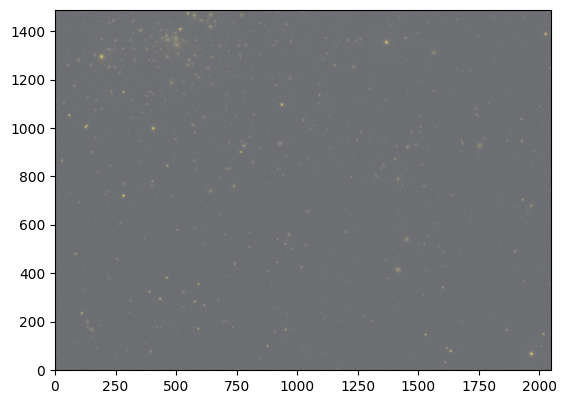

In [3]:
sdss = instantiate(cfg.surveys.sdss)
sdss.prepare_data()
band = 3
image = sdss[0]['image'][band]
log_image = np.log(image - image.min() + 1)
_ = plt.imshow(log_image, origin='lower', cmap='cividis')

### Shear and convergence maps

Here's the posterior mode map for horizontal shear:

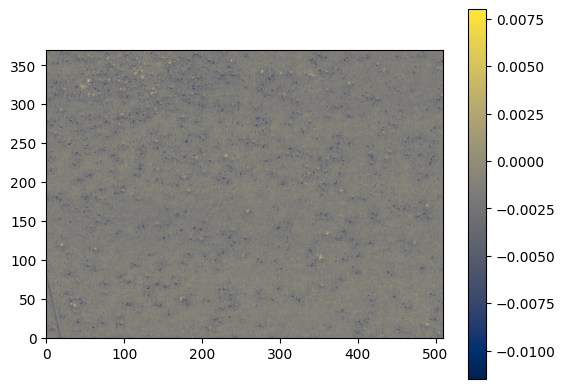

In [4]:
_ = plt.imshow(bliss_cat['mode_cat']['shear'].squeeze()[:,:,0], origin = 'lower', cmap = "cividis")
_ = plt.colorbar()

Here's the posterior mode map for diagonal shear:

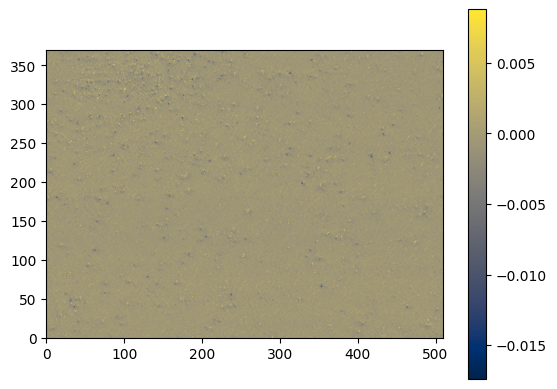

In [5]:
_ = plt.imshow(bliss_cat['mode_cat']['shear'].squeeze()[:,:,1], origin = 'lower', cmap = "cividis")
_ = plt.colorbar()

And here's the posterior mode map for convergence. We expect convergence to be high in the top left corner, which is where the weak lensing effect is demonstrated in the real image (it's more prominent if you look it up on Wikipedia than on the zoomed out image above).

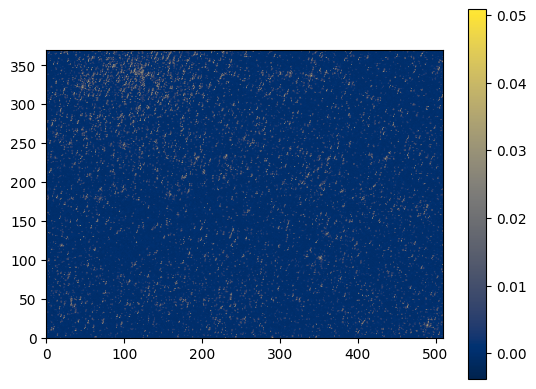

In [6]:
_ = plt.imshow(bliss_cat['mode_cat']['convergence'].squeeze(), origin = 'lower', cmap = "cividis")
_ = plt.colorbar()